# Wavenumber Spectra

In [1]:
import sys, os, shutil, io
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import pandas as pd 


In [ ]:
df_27  = pd.read_csv('../results/wavenumberspectra_Z027.csv')
df_90  = pd.read_csv('../results/wavenumberspectra_Z090.csv')

In [3]:
ustar = 0.468587
zi = 803.132957
a1d = 0.5
ah = 0.54 * (55/18) * a1d

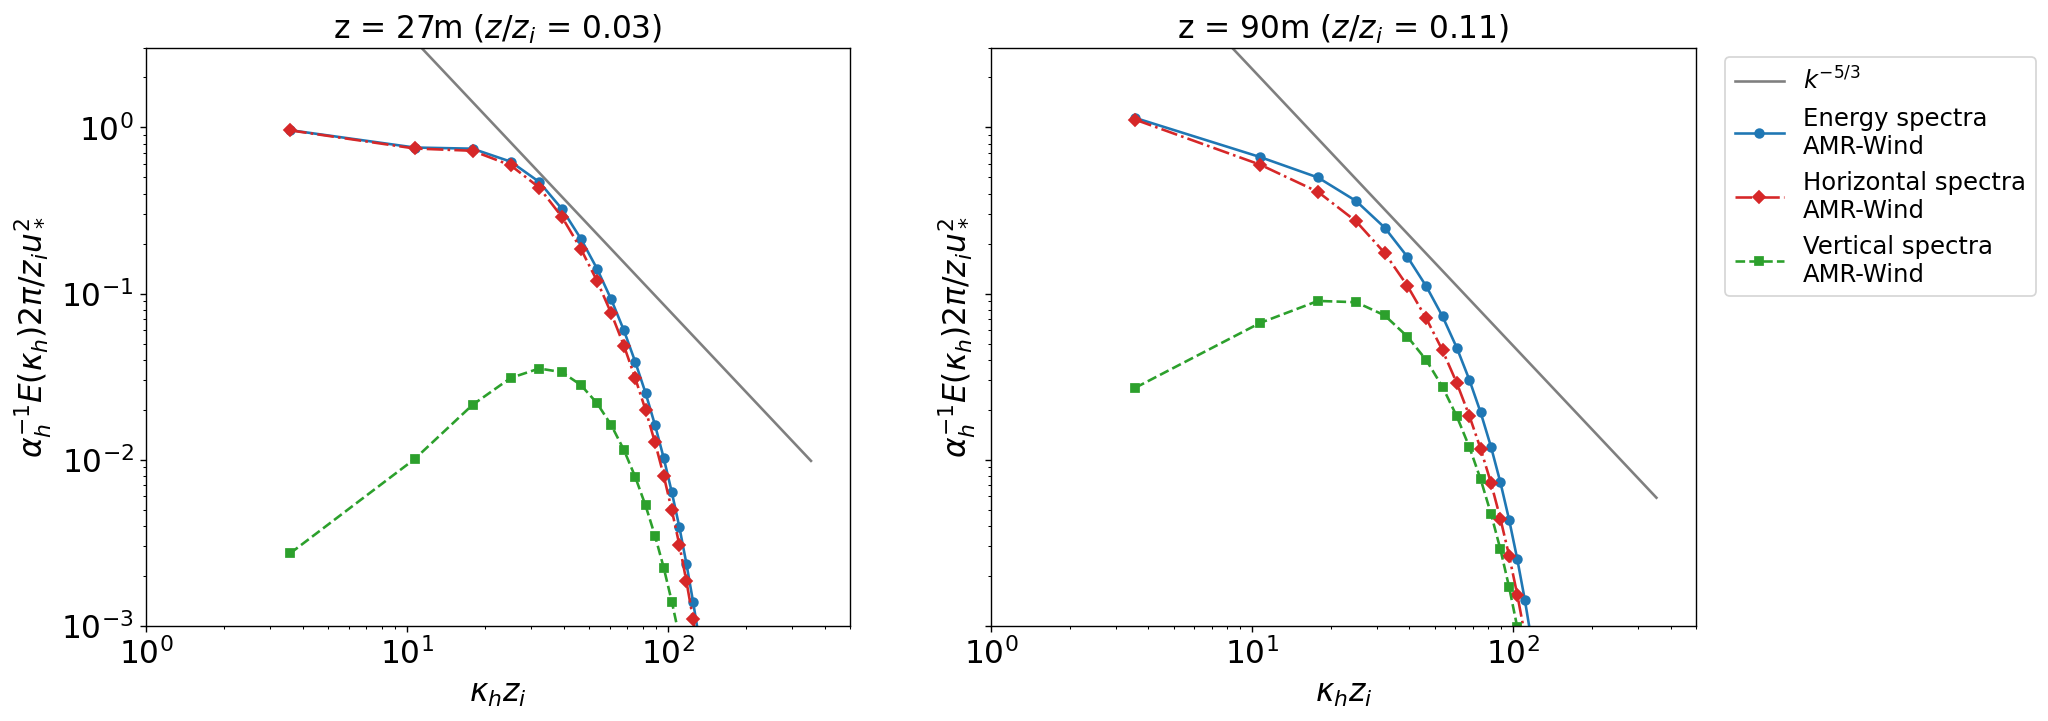

In [6]:
# Run the driver
fsize = 18
s=12
dfs = [df_27,df_90]
fig, axs = plt.subplots(1,len(dfs),figsize=(8*len(dfs),6), dpi=125, sharey=True)
zs = [27,90,]
fact = [0.0025,0.0015,]
for axiter, ax in enumerate(axs):
    plt.sca(ax)
    df = dfs[axiter]
    normz = zs[axiter]/zi
    strz = f"{normz:.2f}"
    ax.set_title('z = '+str(zs[axiter])+'m ($z/z_i$ = ' + strz + ')',fontsize=fsize)
    Escaling =  2 * np.pi / (zi * ustar**2 * ah) 
    kscaling = zi

    plt.xticks(fontsize=fsize)  # Set x tick label font size
    plt.yticks(fontsize=fsize)  # Set y tick label font size

    msize = 5
    plt.loglog(kscaling * df['kmag'],fact[axiter]*df['kmag']**(-5/3),c='tab:gray',ls='-',label='$k^{-5/3}$')
    plt.loglog(kscaling * df['kmag'],Escaling * df['energy'],c='tab:blue',label='Energy spectra\nAMR-Wind',marker='o',markersize=msize,ls='-')
    plt.loglog(kscaling * df['kmag'],Escaling * df['horiz'],c='tab:red',label='Horizontal spectra\nAMR-Wind',marker='D',markersize=msize,ls='-.')
    plt.loglog(kscaling * df['kmag'],Escaling * df['vertical'],c='tab:green',label='Vertical spectra\nAMR-Wind',marker='s',markersize=msize,ls='--')

    plt.ylabel("$\\alpha_h^{-1} E(\kappa_h)2\pi/z_i u_*^2$",fontsize =fsize)
    plt.xlabel("$\kappa_h z_i$",fontsize=fsize)
    if axiter == len(dfs)-1:
        plt.legend(loc=4,fontsize=fsize-4,bbox_to_anchor=(1.5,0.55))

    ax.set_xlim(1,500)
    ax.set_ylim(0.001,3)
plt.savefig("./figures/ABL_wavenumber_spectra.png")
